In [ ]:
pip install pydicom

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/MyDrive/download.zip

Archive:  gdrive/MyDrive/download.zip
   creating: download/ct/
   creating: download/ct/series-000001/
  inflating: download/ct/series-000001/image-000001.dcm  
  inflating: download/ct/series-000001/image-000002.dcm  
  inflating: download/ct/series-000001/image-000003.dcm  
  inflating: download/ct/series-000001/image-000004.dcm  
  inflating: download/ct/series-000001/image-000005.dcm  
  inflating: download/ct/series-000001/image-000006.dcm  
  inflating: download/ct/series-000001/image-000007.dcm  
  inflating: download/ct/series-000001/image-000008.dcm  
  inflating: download/ct/series-000001/image-000009.dcm  
  inflating: download/ct/series-000001/image-000010.dcm  
  inflating: download/ct/series-000001/image-000011.dcm  
  inflating: download/ct/series-000001/image-000012.dcm  
  inflating: download/ct/series-000001/image-000013.dcm  
  inflating: download/ct/series-000001/image-000014.dcm  
  inflating: download/ct/series-000001/image-000015.dcm  
  inflating: download/ct/s

In [ ]:
import pydicom as dicom

path="./series-000001/image-000001.dcm"
x=dicom.dcmread(path)
print(dir(x))

['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GeneratorPower', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'IrradiationEventUID', 'KVP', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NameOfPhysiciansReadingStudy', 'OperatorsName', 'OtherPatientIDs', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PerformedProcedureStepDescription', 'PerformedProcedureStepID', 'PerformedProcedureStepStartDate', 'PerformedProcedureStepStartTime', 'PerformingPhysicianName', 'Photometr

In [ ]:
import pydicom as dicom

path="./series-000002/image-000001.dcm"
x=dicom.dcmread(path)
print(dir(x))

['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GeneratorPower', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'IrradiationEventUID', 'KVP', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'NameOfPhysiciansReadingStudy', 'OperatorsName', 'OtherPatientIDs', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PerformedProcedureStepDescription', 'PerformedProcedureStepID', 'PerformedProcedureStepStartDate', 'PerformedProcedureStepStartTime', 'PerformingPhysicianName', 'Photometr

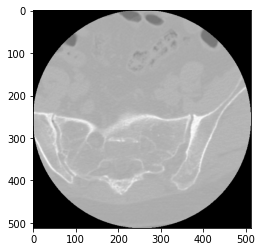

In [ ]:
import pydicom as dicom
import matplotlib.pyplot as plt

path = "./series-000001/image-000001.dcm"
x=dicom.dcmread(path)
plt.imshow(x.pixel_array,cmap=plt.cm.gray)
plt.show()

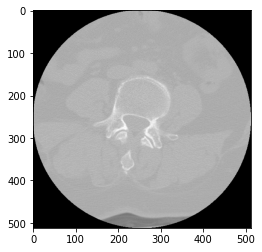

In [ ]:
import pydicom as dicom
import matplotlib.pyplot as plt

path = "./series-000002/image-000001.dcm"
x=dicom.dcmread(path)
plt.imshow(x.pixel_array,cmap=plt.cm.gray)
plt.show()

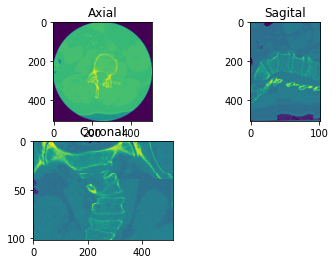

(512, 512)
(512, 512, 102)


In [ ]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os

path="./series-000001"
ct_images=os.listdir(path)

slices = [dicom.read_file(path+'/'+s,force=True) for s in ct_images]
#print(slices)
slices = sorted(slices,key=lambda x:x.ImagePositionPatient[2])

pixel_spacing = slices[0].PixelSpacing
slices_thickess = slices[0].SliceThickness

axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slices_thickess
coronal_aspect_ratio = slices_thickess/pixel_spacing[0]

#print("Pixel spacing is:",pixel_spacing)
#print("Slices Thickness is:",slices_thickess)

#print("Axial Aspect Ratio:",axial_aspect_ratio)
#print("Sagital Aspect Ratio:",sagital_aspect_ratio)
#print("Coronal Aspect Ratio:",coronal_aspect_ratio)

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
volume3d=np.zeros(img_shape)

for i,s in enumerate(slices):
    array2D=s.pixel_array
    volume3d[:,:,i]= array2D

axial=plt.subplot(2,2,1)
plt.title("Axial")
plt.imshow(volume3d[:,:,img_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)


plt.show()




print(array2D.shape)
print(volume3d.shape)  

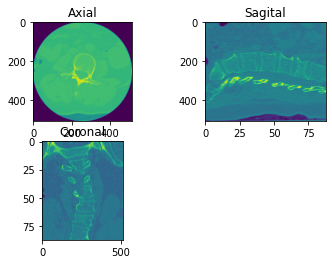

(512, 512)
(512, 512, 88)


In [ ]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os

path="./series-000002"
ct_images=os.listdir(path)

slices = [dicom.read_file(path+'/'+s,force=True) for s in ct_images]
#print(slices)
slices = sorted(slices,key=lambda x:x.ImagePositionPatient[2])

pixel_spacing = slices[0].PixelSpacing
slices_thickess = slices[0].SliceThickness

axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slices_thickess
coronal_aspect_ratio = slices_thickess/pixel_spacing[0]

#print("Pixel spacing is:",pixel_spacing)
#print("Slices Thickness is:",slices_thickess)

#print("Axial Aspect Ratio:",axial_aspect_ratio)
#print("Sagital Aspect Ratio:",sagital_aspect_ratio)
#print("Coronal Aspect Ratio:",coronal_aspect_ratio)

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
volume3d=np.zeros(img_shape)

for i,s in enumerate(slices):
    array2D=s.pixel_array
    volume3d[:,:,i]= array2D

axial=plt.subplot(2,2,1)
plt.title("Axial")
plt.imshow(volume3d[:,:,img_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)


plt.show()




print(array2D.shape)
print(volume3d.shape) 

In [ ]:
import pydicom as dicom
import numpy as np
from PIL import Image
import os

def convert(directory):
    im = dicom.dcmread('series-000001/'+directory)
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max()) * 255 # float pixel
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image


path="series-000001"
ct_images = os.listdir(path)
arr_filename = [x for x in ct_images if x.endswith(".dcm")]

for name in arr_filename:
    image = convert(name)
    image.save('img'+name+'.jpg')

In [ ]:
import pydicom as dicom
import numpy as np
from PIL import Image
import os

def convert(directory):
    im = dicom.dcmread('series-000002/'+directory)
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max()) * 255 # float pixel
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image


path="series-000002"
ct_images = os.listdir(path)
arr_filename = [x for x in ct_images if x.endswith(".dcm")]

for name in arr_filename:
    image = convert(name)
    image.save('img'+name+'.jpg')

In [ ]:
import pydicom as dicom
import numpy as np
from PIL import Image
import os

def convert(directory):
    im = dicom.dcmread('series-000003/'+directory)
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max()) * 255 # float pixel
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image


path="series-000003"
ct_images = os.listdir(path)
arr_filename = [x for x in ct_images if x.endswith(".dcm")]

for name in arr_filename:
    image = convert(name)
    image.save('img'+name+'.jpg')

In [ ]:
import pydicom as dicom
import numpy as np
from PIL import Image
import os

def convert(directory):
    im = dicom.dcmread('series-000004/'+directory)
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max()) * 255 # float pixel
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image


path="series-000004"
ct_images = os.listdir(path)
arr_filename = [x for x in ct_images if x.endswith(".dcm")]

for name in arr_filename:
    image = convert(name)
    image.save('img'+name+'.jpg')

In [ ]:
import csv
from os import write
import pydicom as dicom

ds =  dicom.dcmread("series-000001/image-000001.dcm")

with open('my.csv','w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow("Group Elem Description VR Value".split())
    for elem in ds:
        writer.writerow([
            f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
            elem.description(),elem.VR,str(elem.value)
        ])

In [ ]:
import csv
from os import write
import pydicom as dicom

ds =  dicom.dcmread("series-000002/image-000001.dcm")

with open('my2.csv','w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow("Group Elem Description VR Value".split())
    for elem in ds:
        writer.writerow([
            f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
            elem.description(),elem.VR,str(elem.value)
        ])

In [ ]:
import csv
from os import write
import pydicom as dicom

ds =  dicom.dcmread("series-000003/image-000001.dcm")

with open('my3.csv','w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow("Group Elem Description VR Value".split())
    for elem in ds:
        writer.writerow([
            f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
            elem.description(),elem.VR,str(elem.value)
        ])

In [ ]:
import csv
from os import write
import pydicom as dicom

ds =  dicom.dcmread("series-000004/image-000001.dcm")

with open('my4.csv','w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow("Group Elem Description VR Value".split())
    for elem in ds:
        writer.writerow([
            f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
            elem.description(),elem.VR,str(elem.value)
        ])

In [ ]:
import pydicom as dicom
import os
import csv

data_dir= "series-000001"
patients = os.listdir(data_dir)
with open('file1.csv','w') as myfile:
    writer = csv.writer(myfile)
    writer.writerow("Group Elem Description VR Value".split())
    for patient in patients:
        if patient.lower().endswith('.dcm'):
            dm = dicom.dcmread(os.path.join(data_dir,patient))
            for elem in dm:
                writer.writerow([
                    f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
                    elem.description(),elem.VR,str(elem.value)
                ])

In [ ]:
import pydicom as dicom
import os
import csv

data_dir= "series-000002"
patients = os.listdir(data_dir)
with open('file2.csv','w') as myfile:
    writer = csv.writer(myfile)
    writer.writerow("Group Elem Description VR Value".split())
    for patient in patients:
        if patient.lower().endswith('.dcm'):
            dm = dicom.dcmread(os.path.join(data_dir,patient))
            for elem in dm:
                writer.writerow([
                    f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
                    elem.description(),elem.VR,str(elem.value)
                ])

In [ ]:
import pydicom as dicom
import os
import csv

data_dir= "series-000003"
patients = os.listdir(data_dir)
with open('file3.csv','w') as myfile:
    writer = csv.writer(myfile)
    writer.writerow("Group Elem Description VR Value".split())
    for patient in patients:
        if patient.lower().endswith('.dcm'):
            dm = dicom.dcmread(os.path.join(data_dir,patient))
            for elem in dm:
                writer.writerow([
                    f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
                    elem.description(),elem.VR,str(elem.value)
                ])

In [ ]:
import pydicom as dicom
import os
import csv

data_dir= "series-000004"
patients = os.listdir(data_dir)
with open('file4.csv','w') as myfile:
    writer = csv.writer(myfile)
    writer.writerow("Group Elem Description VR Value".split())
    for patient in patients:
        if patient.lower().endswith('.dcm'):
            dm = dicom.dcmread(os.path.join(data_dir,patient))
            for elem in dm:
                writer.writerow([
                    f"{elem.tag.group:04x}", f"{elem.tag.element:04x}",
                    elem.description(),elem.VR,str(elem.value)
                ])